# Huffman tree
- visualization https://people.ok.ubc.ca/ylucet/DS/Huffman.html

In [23]:
import sys
from collections import Counter
import random

In [24]:
# class for tree node structure
class Node:
    def __init__(self, freq, char = None):
        self.freq = freq
        self.char = char
        self.left = None
        self.right = None

# Class for priority queue and Huffman tree with various helper functions and methods
class Tree:
    def __init__(self):
        self.items = []
    
    # add element to queue
    def append(self, node):
        self.items.append(node)
        return
    
    # remove priority element from queue
    def pull(self):
        return self.items.pop(0)
    
    # allow to insert an element taking frequency order in consideration
    def insert(self, node):
        size=self.length()
        if size == 0:
            self.items.append(node)
            return
        if node.freq >= self.items[size-1].freq:
            self.items.append(node)
            return
        for i in range(size):
            if node.freq >= self.items[i].freq:
                continue
            else:
                self.items.insert(i, node)
                break
    
    # return length of the queue
    def length(self):
        return len(self.items)
    
    def is_empty(self):
        return len(self.items) == 0

# Encoding step

In [25]:
def huffman_encoding(data):
    '''perform the encoding step of the data
    input = data (str)
    outputs:
        - char2code dictionary with the code associated to each character
        - code: encoded input data (str)
        - q: Huffman tree with 1 element providing the head (Tree class)
    '''
    
    # defensive assertions
    assert type(data)== str, "please provide a string"
    assert len(data)!=0, "The provided string to encode is an empty string"
    
    # Build list of characters sorted by frequency of occurence (ascending order)
    # compexity O(n) with n= number of characters
    count = Counter()
    for letter in data:
        count.update(letter)
    sorted_list = [(k,v) for k,v in count.items()]
    sorted_list.sort(key= lambda x: x[1])
    
    #print('The freqencies of the characters in the message is:')
    #print(sorted_list)
    
    # Build priority queue for Huffman using sorted list
    # compexity O(n) with n= number of characters
    q = Tree()
    for char,freq in sorted_list:
        new_node = Node(freq,char)
        q.append(new_node)
    
    # Build Huffman Tree
    ''' Pull operations from priority list is O(1)
        insert operation is O(nlogn) in the worst case due to reduction of dataset at each step
        overall the construction step has a worst case complexity O(nlogn)
    '''
    while q.length()>=2:
        # pull the first two priority items with lowest frequencies
        first = q.pull()
        second = q.pull()
        # create internal node with combined frequency and left / right children
        freq = first.freq + second.freq
        internal_node = Node(freq)
        internal_node.left = first
        internal_node.right = second
        # insert new node back in the queue with frequency order
        q.insert(internal_node)
    
    # Generate code for each character (leaf nodes)
    def traverse(node, code, char2code):
        '''Traverse the tree till a leaf is reached to determine code for each character. I use recursive approach.
        this operation has worst case complexity of k x n where k is the number of node levels
        so overall complexity is O(n)
        inputs: node = current node, code = encoding container (str), char2code = dictionary mapping characters to their unique codes
        outputs: code = encoded sequence(str) during recursion, char2code = dictionary mapping chars to codes
        '''
        if node:
            if node.left:
                code+='0'
                code, char2code = traverse(node.left, code, char2code)
            if node.right:
                code+='1'
                code, char2code = traverse(node.right, code, char2code)
            if node.char:
                char2code[node.char] = code
            # remove last digit going back to previous node when:
            # - a leaf / character has been reached
            # - no further child is available during recursive process
            code=code[:-1]
        return code, char2code
    
    node = q.items[0]
    code = ''
    char2code = {}
    _, char2code = traverse(node, code, char2code)
        
    # Generate encoded data
    # This step has compexity O(n). Access to dictionary is in constant time.
    code = ''
    for letter in data:
        code+=char2code[letter]
    
    return char2code, code, q

# decoding step

In [26]:
def huffman_decoding(data,tree):
    '''
    perform decoding of an encoded sequence to a string
    inputs: data = encoded sequence (str), tree = huffman tree used for encoding
    complexity is O(k) with k the number of digits in the encoded sequence. 
    Since k is a multiple of n, complexity is O(n)
    '''
    decoded_string = ''
    node = tree.items[0]
    for digit in data:
        if digit=='0':
            if node.left:
                node = node.left
                            
        elif digit=='1':
            if node.right:
                node = node.right
                        
        if node.char:   
            decoded_string+=node.char
            node= tree.items[0]
            
    return decoded_string  

# Data viz

In [27]:
def draw(tree):
    node=tree.items[0]
    

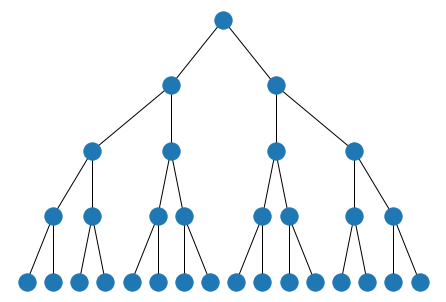

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2, 4)  # num children, num layers

pos = graphviz_layout(T, prog="dot")
nx.draw(T, pos)
plt.show()


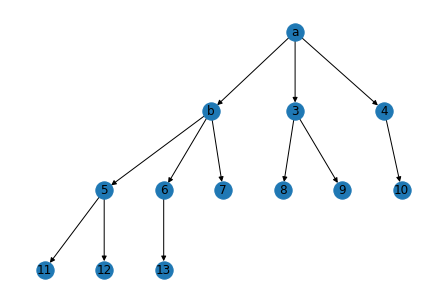

In [29]:
g=nx.DiGraph()
g.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9),
                   (5,11), (5,12), (6,13)], label='papa')
g.add_edge(4,10, label='toto')
mapping={1:'a',2:'b'}
g = nx.relabel_nodes(g,mapping)
#p=nx.drawing.nx_pydot.to_pydot(g)
pos = graphviz_layout(g, prog="dot")
nx.draw(g, pos,with_labels=True)
plt.show()

# Testing

In [30]:
if __name__ == "__main__":
    codes = {}
    
    '''
    Five test cases are provided. Note the 2 extreme cases: empty string, not string input
    '''
    
    sentences = ["AAAAAAABBBCCCCCCCDDEEEEEE", "The bird is the word", random.choice(['', 123, '@Udacity: Is this project finished?'])]
    
    for index, sentence in enumerate(sentences):
        
        print(f'\n=================== Test n°{index+1} ===================\n')

        print ("The size of the data is: {}\n".format(sys.getsizeof(sentence)))
        print ("The content of the data is: {}\n".format(sentence))
    
        codes, encoded_data, tree = huffman_encoding(sentence)
    
        print ("The size of the encoded data is: {}\n".format(sys.getsizeof(int(encoded_data, base=2))))
        print ("The content of the encoded data is: {}\n".format(encoded_data))
    
        decoded_data = huffman_decoding(encoded_data, tree)
    
        print ("The size of the decoded data is: {}\n".format(sys.getsizeof(decoded_data)))
        print ("The content of the encoded data is: {}\n".format(decoded_data))



=================== Test n°1 ===================

The size of the data is: 74

The content of the data is: AAAAAAABBBCCCCCCCDDEEEEEE

The size of the encoded data is: 32

The content of the encoded data is: 1010101010101000100100111111111111111000000010101010101

The size of the decoded data is: 74

The content of the encoded data is: AAAAAAABBBCCCCCCCDDEEEEEE


=================== Test n°2 ===================

The size of the data is: 69

The content of the data is: The bird is the word

The size of the encoded data is: 36

The content of the encoded data is: 0110111011111100111000001010110000100011010011110111111010101011001010

The size of the decoded data is: 69

The content of the encoded data is: The bird is the word


=================== Test n°3 ===================

The size of the data is: 84

The content of the data is: @Udacity: Is this project finished?

The size of the encoded data is: 44

The content of the encoded data is: 01110011111111110000010000011011000110010001100